In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import scipy.stats
import math
%matplotlib inline

In [52]:
human_temp=pd.read_csv('C:\\Users\\Ryan May\\Desktop\\Springboard\\human_temp.csv')

In [53]:
human_temp.columns

Index(['temperature', 'gender', 'heart_rate'], dtype='object')

In [54]:
human_temp.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


The best to visually check if the data is normally distributed is to bin the values and see they follow a standard bell curve.

In [55]:
temps_obs=human_temp.temperature.sort_values()

In [56]:
bin_vals=np.arange(start=temps_obs.min(), stop=temps_obs.max(),step=.05)

In [57]:
mean, std=temps_obs.mean(), temps_obs.std()

In [58]:
p=norm.pdf(temps_obs,mean,std)

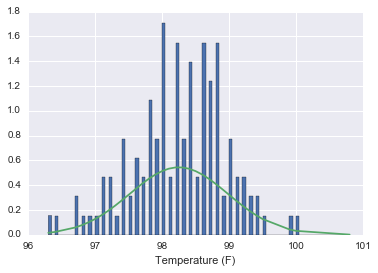

In [47]:
n, bin_vals, patches=plt.hist(temps_obs, bins=bin_vals, normed=True, stacked=True)
plt.plot(temps_obs, p)
plt.xlabel('Temperature (F)')
plt.show()

The temperature values are not quite in a perfect bell curve, however most of the values are well within one standard deviation.

The number of observations will determine statistical analysis will be meaningful.

In [50]:
len(temps_obs)

130

In [62]:
k2,p=scipy.stats.normaltest(temps_obs)

In [63]:
print(p)

0.258747986349


Since the number of observations is over 30, the sample size is large enough to use and because each individual's temperature does not depend on someone elses', the observations are independent.

It's common knowledge that the normal body temperature is 98.6 degrees fahrenheit, but do the observations in the dataset reflect that?  To determine this, the one-sample test will be used.  One-sample testing works here because these are observed values and cannot be intervened with and changed.  

Since we do not know if the standard deviation of the population but the population is large, we shall use the t statistic.  

In [59]:
(temps_obs.mean()-98.6) / (temps_obs.std()/math.sqrt(130))

-5.454823292364301

Since the t statistic (-5.455) is less than the calculated critical t value of -1.98, we can reject the null hypothesis that 98.6 is the mean temperature of humans.  Since the p-value is 0.25 we can confidently reject the null hypothesis. 

If the z statistic was used, z stat for a 95% CI is 1.96.  This is not a significant difference but any change in parmeters can change results. 


To calculate the confidence interval the formula is the mean + or - (t alpha times the standard error). 

In [66]:
temps_obs.mean()-(1.98*(temps_obs.std()/math.sqrt(130))), temps_obs.mean()+(1.98*(temps_obs.std()/math.sqrt(130)))

(98.12190802389173, 98.37655351456979)

If any of the observations lay outside of these two numbers, the observation will be considered abnormal.

In [70]:
len(human_temp[human_temp.gender=='M'])

65

In [71]:
len(human_temp[human_temp.gender=='F'])

65

In [72]:
male_obs=human_temp[human_temp.gender=='M']

In [73]:
female_obs=human_temp[human_temp.gender=='F']

Here the two sample t test will be used to check if there is a significant difference between men and women in terms of temperature.

The null hypothesis is the the mean of the male sample is equal to the female sample mean.  The standard error and the critial value for 95% confidence interval.

In [75]:
male_temps=male_obs.temperature
female_temps=female_obs.temperature

In [76]:
male_temps.mean(), female_temps.mean()

(98.1046153846154, 98.39384615384613)

In [77]:
male_temps.mean()-female_temps.mean()

-0.289230769230727

In [78]:
female_temps.std(), male_temps.std()

(0.7434877527313665, 0.6987557623265908)

The population variance is not known so the sample variance can be used in it's stead.

In [81]:
math.sqrt(male_temps.var()+female_temps.var())

1.0203105673500361

The t value for a 95%CI and 127 df is 1.98.  If the differnce of the means is above the critical t value times the margin of error, the null hypothesis should be rejected.

In [84]:
1.980*(math.sqrt(male_temps.var()+female_temps.var())/math.sqrt(65))

0.25057682183125635

The observed difference is more than the 95% confidence interval, so the null hypothesis can be reject, meaning that males and females have difference mean temperatures.